In [19]:
import matplotlib. pyplot as plt
import pandas as pd
import numpy as np

In [20]:
f= 'Simulations_complete_V2.xlsx'
df= pd.read_excel(f, index_col=0)

In [21]:
df

,EffectSize,n,PercentRejected,PercentRejectedStDev,Reward,RewardStDev,PropOpt,PropOptStDev
Algorithm,,,,,,,,
Uniform,0.0,785,0.055,0.002,NaN,NaN,NaN,NaN
Uniform,0.0,197,0.058,0.002,NaN,NaN,NaN,NaN
Uniform,0.1,785,0.806,0.004,0.5000,0.000,0.500,0.000
Uniform,0.2,197,0.806,0.004,0.5000,0.001,0.500,0.001
TS,0.0,785,0.135,0.003,NaN,NaN,NaN,NaN
TS,0.0,197,0.139,0.003,NaN,NaN,NaN,NaN
TS,0.1,785,0.564,0.005,0.5360,0.000,0.860,0.003
TS,0.2,197,0.598,0.005,0.5730,0.001,0.863,0.002
TS-PostDiff (c=0.1),0.0,785,0.078,0.003,NaN,NaN,NaN,NaN


In [22]:
df_es0pt1 = df[df["EffectSize"] == 0.1]
df_es0pt2 = df[df["EffectSize"] == 0.2]

df_es0pt1_ets0pt1 = df_es0pt1.loc['epsilon-TS (epsilon=0.1)']
df_es0pt1_ts = df_es0pt1.loc['TS']
df_es0pt1_ur = df_es0pt1.loc['Uniform']

In [23]:
def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

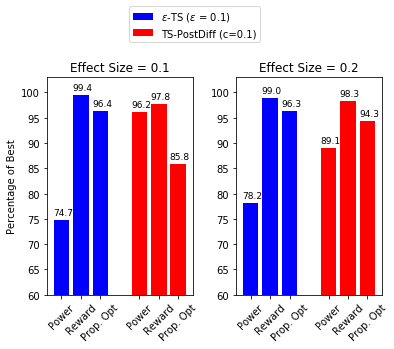

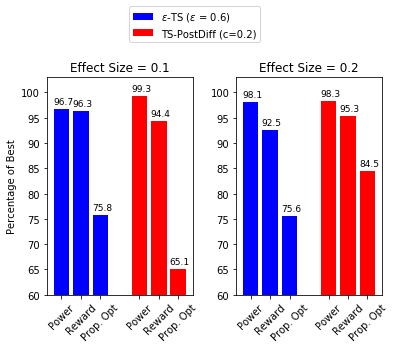

In [24]:

def plot_bars_ets(df, epsilon = 0.1, c = 0.1, ymin = 0.6, include_postdiff = False):
    fig, ax = plt.subplots(1,2)
    ax = ax.ravel()
    es_list = [0.1, 0.2]
    i=0
    for es in es_list:
        df_es0pt1 = df[df["EffectSize"] == es]

        df_es0pt1_ets0pt1 = df_es0pt1.loc['epsilon-TS (epsilon={})'.format(epsilon)]
        df_es0pt1_ts = df_es0pt1.loc['TS']
        df_es0pt1_ur = df_es0pt1.loc['Uniform']

        ax[i].bar(0,100*df_es0pt1_ets0pt1['PercentRejected']/ df_es0pt1_ur['PercentRejected'], label = '$\epsilon$-TS ($\epsilon$ = {})'.format(epsilon), color = 'blue')
        ax[i].bar(1,100*df_es0pt1_ets0pt1['Reward']/df_es0pt1_ts['Reward'], color = 'blue')
        ax[i].bar(2,100*df_es0pt1_ets0pt1['PropOpt']/df_es0pt1_ts['PropOpt'], color = 'blue')
        ax[i].set_ylim(100*ymin,100*1.15)
       # ax[i].legend()
        ##--------------------------
      #  print(df_es0pt1.index)
        ax[i].set_title("Effect Size = {}".format(es))
        
        labels = ['Power', 'Reward', 'Prop. Opt']
        x = np.arange(len(labels))
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(labels)
        
        if i == 0 or i == 2:
            ax[i].set_ylabel("Percentage of Best")
        
        if include_postdiff:
            if c == 0.1:
                df_pd = df_es0pt1.loc['TS-PostDiff (c={}) '.format(c)]
            else:
                df_pd = df_es0pt1.loc['TS-PostDiff (c={})'.format(c)]
            df_es0pt1_ts = df_es0pt1.loc['TS']
            df_es0pt1_ur = df_es0pt1.loc['Uniform']

            rects = ax[i].bar(4, 100*df_pd['PercentRejected']/ df_es0pt1_ur['PercentRejected'],\
                              color = 'red', label = 'TS-PostDiff (c={})'.format(c))
            rects = ax[i].bar(5, 100*df_pd['Reward']/df_es0pt1_ts['Reward'], color = 'red')
           
            ax[i].bar(6,100*df_pd['PropOpt']/df_es0pt1_ts['PropOpt'], color='red')
            
            ax[i].set_ylim(100*ymin, 100*1.03)
            ax[i].set_title("Effect Size = {}".format(es))
            if i == 1 or i == 3:
                ax[i].legend(bbox_to_anchor=(0.2, 1.35))

            labels = ['Power', 'Reward', 'Prop. Opt', 'Power', 'Reward', 'Prop. Opt']
            x = np.arange(len(labels))
            x = [0, 1, 2, 4,5,6]
            #x = x+1
            ax[i].set_xticks(x)
            ax[i].set_xticklabels(labels, rotation = 45)
       #     y = [df_pd['PercentRejected']/ df_es0pt1_ur['PercentRejected'], \
       #          df_pd['Reward']/df_es0pt1_ts['Reward'], df_pd['PropOpt']/df_es0pt1_ts['PropOpt'],\
       #          df_pd['PropOpt']/df_es0pt1_ts['PropOpt']]
       #     y = np.array(y)
       #     y = np.round(y, 3)
            
#             for j, v in enumerate(y):
#                 ax[i].text(j-.25, 
#                           v/labels[j]+100, 
#                           labels[j], 
#                           fontsize=18)
          #  for j, v in enumerate(y):
          #      ax[i].text(v + 1, j + .25, str(v), color='blue', fontweight='bold')
            totals = []
            #autolabel(rects, ax[i])
            for j in ax[i].patches:
                totals.append(j.get_height())

            # set individual bar lables using above list
            total = sum(totals)

            # set individual bar lables using above list
            for j in ax[i].patches:
                # get_x pulls left or right; get_height pushes up or down
                ax[i].text(j.get_x()-.03, j.get_height()+100*.01, \
                        str(round((j.get_height()), 1)), fontsize=9.0)

        
        i+=1
        #plt.tight_layout()
        fig.subplots_adjust(wspace=0.3)
    
#plot_bars_ets(df)
#plot_bars_ets(df, epsilon = 0.6, c = 0.2, ymin = 0.6)

plot_bars_ets(df, include_postdiff = True)
plot_bars_ets(df, epsilon = 0.6, c = 0.2, ymin = 0.6, include_postdiff = True)